# **PROYECTO PRIMER PARCIAL**

# **INTEGRANTES**

1.   Espinoza Grace
2.   Holguin Allison
3.   Sabando Keneth
4.   Sonorza Jordano
6.   Torres Angie

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. EL OBEJTIVO

***Educación de calidad***                                                             

    
**Garantizar una educación inclusiva, equitativa y de calidad y promover oportunidades de aprendizaje durante toda la vida para todos** 

In [ ]:
proye = pd.read_csv('/content/drive/MyDrive/Ciencia de Datos/Proyecto/Dataset/API_4_DS2_es_csv_v2_4787574.csv',skiprows=4, index_col=False)
#proye = pd.read_csv('/content/drive/MyDrive/dataset/PROYECTO/Data Educacion .csv',skiprows=4,index_col=-1)
proye.head(10)

Country Name Country Code  \
0        Aruba          ABW   
1        Aruba          ABW   
2        Aruba          ABW   
3        Aruba          ABW   
4        Aruba          ABW   
5        Aruba          ABW   
6        Aruba          ABW   
7        Aruba          ABW   
8        Aruba          ABW   
9        Aruba          ABW   

                                      Indicator Name     Indicator Code  \
0  Población entre 15 y 64 años de edad (% del to...  SP.POP.1564.TO.ZS   
1  Población entre 0 y 14 años de edad (% del total)  SP.POP.0014.TO.ZS   
2  Desempleo, total (% de la población activa tot...     SL.UEM.TOTL.ZS   
3  Desempleo, varones (% de la población activa m...  SL.UEM.TOTL.MA.ZS   
4  Desempleo, mujeres (% de la población activa f...  SL.UEM.TOTL.FE.ZS   
5                            Población activa, total     SL.TLF.TOTL.IN   
6  Población activa, mujeres (% de la población a...  SL.TLF.TOTL.FE.ZS   
7  Probability of dying among youth ages 20-24 ye...        SH.DYN.2024   
8  Probability of dying among adolescents ages 15...        SH.DYN.1519   
9  Probability of dying among adolescents ages 10...        SH.DYN.1014   

        1960       1961       1962       1963       1964       1965  ...  \
0  54.495678  54.588701  54.585630  54.674206  54.873448  55.181477  ...   
1  43.131043  42.949419  42.852732  42.661157  42.359159  41.936664  ...   
2        NaN        NaN        NaN        NaN        NaN        NaN  ...   
3        NaN        NaN        NaN        NaN        NaN        NaN  ...   
4        NaN        NaN        NaN        NaN        NaN        NaN  ...   
5        NaN        NaN        NaN        NaN        NaN        NaN  ...   
6        NaN        NaN        NaN        NaN        NaN        NaN  ...   
7        NaN        NaN        NaN        NaN        NaN        NaN  ...   
8        NaN        NaN        NaN        NaN        NaN        NaN  ...   
9        NaN        NaN        NaN        NaN        NaN        NaN  ...   

        2013       2014       2015       2016       2017       2018  \
0  69.795393  69.620827  69.352325  69.027743  68.681269  68.320569   
1  19.348756  19.045505  18.799607  18.571721  18.334859  18.069771   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN        NaN   
5        NaN        NaN        NaN        NaN        NaN        NaN   
6        NaN        NaN        NaN        NaN        NaN        NaN   
7        NaN        NaN        NaN        NaN        NaN        NaN   
8        NaN        NaN        NaN        NaN        NaN        NaN   
9        NaN        NaN        NaN        NaN        NaN        NaN   

        2019       2020       2021  Unnamed: 66  
0  67.962515  67.712003  67.657094          NaN  
1  17.767339  17.351022  16.799407          NaN  
2        NaN        NaN        NaN          NaN  
3        NaN        NaN        NaN          NaN  
4        NaN        NaN        NaN          NaN  
5        NaN        NaN        NaN          NaN  
6        NaN        NaN        NaN          NaN  
7        NaN        NaN        NaN          NaN  
8        NaN        NaN        NaN          NaN  
9        NaN        NaN        NaN          NaN  

[10 rows x 67 columns]

In [ ]:
def get_years():
  years = []
  for i in range(1960,2022):
    years.append(str(i))
  return years

Cambiar columnas a filas

In [ ]:
dfokf = proye.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']
               ,value_vars=get_years(),var_name='Year',value_name='Valor')
dfokf['Year'] = dfokf['Year'].astype(int)
dfokf.sample(10)

Country Name Country Code  \
1325040                           Polinesia Francesa          PYF   
1931434                             Pequeños Estados          SST   
2277834                        Islas Turcas y Caicos          TCA   
362982                  Irán, República Islámica del          IRN   
1578583                                       Malawi          MWI   
1631749  Asia oriental y el Pacífico (BIRF y la AIF)          TEA   
2172140                                  Isla de Man          IMN   
1113389                                    Eslovenia          SVN   
1597748                                   Bangladesh          BGD   
2299586    Hong Kong, Región Administrativa Especial          HKG   

                                            Indicator Name  \
1325040  Nivel de instrucción, al menos nivel de licenc...   
1931434  Educación de nivel secundario, alumnos en prog...   
2277834  Perseverancia en la escuela hasta el quinto gr...   
362982               Educación de nivel primario, maestros   
1578583  Maestros capacitados en el ciclo inferior de l...   
1631749  Nivel de instrucción, al menos ciclo inferior ...   
2172140  Adolescentes que no asisten a la escuela (% de...   
1113389  Tasa bruta de ingreso en primer grado, total (...   
1597748  Maestros capacitados en educación de nivel pri...   
2299586  Tasa de alfabetización, total de jóvenes (% de...   

               Indicator Code  Year     Valor  
1325040  SE.TER.CUAT.BA.MA.ZS  1990       NaN  
1931434        SE.SEC.ENRL.VO  2004  173022.4  
2277834     SE.PRM.PRS5.FE.ZS  2012       NaN  
362982            SE.PRM.TCHR  1968       NaN  
1578583     SE.SEC.TCAQ.LO.ZS  1996       NaN  
1631749     SE.SEC.CUAT.LO.ZS  1997       NaN  
2172140     SE.SEC.UNER.LO.ZS  2010       NaN  
1113389        SE.PRM.GINT.ZS  1985       NaN  
1597748     SE.PRM.TCAQ.MA.ZS  1997       NaN  
2299586     SE.ADT.1524.LT.ZS  2013       NaN

In [ ]:
dftempf = dfokf[['Country Name', 'Country Code','Indicator Name', 'Indicator Code',
       'Year', 'Valor']]
dftempf.sample(5)

Country Name Country Code  \
2523181  Isla de San Martín (parte francesa)          MAF   
439080                                  Cuba          CUB   
2216562                               Italia          ITA   
1742039                                 Iraq          IRQ   
1183140                                Kenya          KEN   

                                            Indicator Name  \
2523181           Relación alumno-maestro, nivel terciario   
439080     Transición a la escuela secundaria, varones (%)   
2216562     Educación de nivel secundario, duración (años)   
1742039  Maestros capacitados en el ciclo superior de l...   
1183140  Maestros capacitados en educación de nivel sec...   

               Indicator Code  Year  Valor  
2523181     SE.TER.ENRL.TC.ZS  2018    NaN  
439080      SE.SEC.PROG.MA.ZS  1970    NaN  
2216562           SE.SEC.DURS  2011    8.0  
1742039  SE.SEC.TCAQ.UP.FE.ZS  2000  100.0  
1183140     SE.SEC.TCAQ.MA.ZS  1987    NaN

In [ ]:
dfokf = dftempf.pivot(index=['Country Name', 'Country Code', 'Year'],columns=['Indicator Name'],values='Valor').reset_index()
dfokf.sample(5)

Indicator Name                     Country Name Country Code  Year  \
1235            Asia meridional (BIRF y la AIF)          TSA  2017   
9922                                   Mongolia          MNG  1962   
9302                                     Malawi          MWI  1962   
6380                          Guinea Ecuatorial          GNQ  2016   
6489                                     Guyana          GUY  2001   

Indicator Name  Adolescentes que no asisten a la escuela (% de adolescentes en edad de asistir al ciclo inferior de la escuela secundaria)  \
1235                                                          NaN                                                                            
9922                                                          NaN                                                                            
9302                                                          NaN                                                                            
6380                                                          NaN                                                                            
6489                                                          NaN                                                                            

Indicator Name  Adolescentes que no asisten a la escuela, mujeres (% de mujeres en edad de asistir al ciclo inferior de la escuela secundaria)  \
1235                                                          NaN                                                                                
9922                                                          NaN                                                                                
9302                                                          NaN                                                                                
6380                                                          NaN                                                                                
6489                                                          NaN                                                                                

Indicator Name  Adolescentes que no asisten a la escuela, varones (% de varones en edad de asistir al ciclo inferior de la escuela secundaria)  \
1235                                                          NaN                                                                                
9922                                                          NaN                                                                                
9302                                                          NaN                                                                                
6380                                                          NaN                                                                                
6489                                                          NaN                                                                                

Indicator Name  Alumnos de mayor edad, nivel primario, (% de matrícula)  \
1235                                                          NaN         
9922                                                          NaN         
9302                                                          NaN         
6380                                                          NaN         
6489                                                          NaN         

Indicator Name  Alumnos de mayor edad, nivel primario, mujeres (% de matrícula de mujeres)  \
1235                                                          NaN                            
9922                                                          NaN                            
9302                                                          NaN                            
6380                                                          NaN                            
6489                                               

**LIMPIAR LOS DATOS**

In [ ]:
dfokf.fillna(0.,inplace=True)
dfokf.sample(5)

Indicator Name           Country Name Country Code  Year  \
13677                      Seychelles          SYC  1997   
12282                           Qatar          QAT  1966   
10039                      Montenegro          MNE  2017   
11437                          Panamá          PAN  1989   
13486           Santo Tomé y Príncipe          STP  1992   

Indicator Name  Adolescentes que no asisten a la escuela (% de adolescentes en edad de asistir al ciclo inferior de la escuela secundaria)  \
13677                                                      0.0000                                                                            
12282                                                      0.0000                                                                            
10039                                                      4.3921                                                                            
11437                                                      0.0000                                                                            
13486                                                      0.0000                                                                            

Indicator Name  Adolescentes que no asisten a la escuela, mujeres (% de mujeres en edad de asistir al ciclo inferior de la escuela secundaria)  \
13677                                                     0.00000                                                                                
12282                                                     0.00000                                                                                
10039                                                     3.95734                                                                                
11437                                                     0.00000                                                                                
13486                                                     0.00000                                                                                

Indicator Name  Adolescentes que no asisten a la escuela, varones (% de varones en edad de asistir al ciclo inferior de la escuela secundaria)  \
13677                                                     0.00000                                                                                
12282                                                     0.00000                                                                                
10039                                                     4.78685                                                                                
11437                                                     0.00000                                                                                
13486                                                     0.00000                                                                                

Indicator Name  Alumnos de mayor edad, nivel primario, (% de matrícula)  \
13677                                                     0.00000         
12282                                                     0.00000         
10039                                                     2.17605         
11437                                                    14.09085         
13486                                                     0.00000         

Indicator Name  Alumnos de mayor edad, nivel primario, mujeres (% de matrícula de mujeres)  \
13677                                                     0.00000                            
12282                                                     0.00000                            
10039                                                     1.76219                            
11437                                                    12.25787                            
13486                                                     0.00000                            

Indicator Name  

# **Hacer el análisis exploratorio de las variables (indicadores) y el análisis correlacional. Si algún indicador no se correlaciona puede volver al paso 2 y seleccionar otros. Haga las anotaciones para su reporte, esta información sirve para el análisis.**

***Analisis exploratorio***

In [ ]:
dfokf.columns

Index(['Country Name', 'Country Code', 'Year',
       'Adolescentes que no asisten a la escuela (% de adolescentes en edad de asistir al ciclo inferior de la escuela secundaria)',
       'Adolescentes que no asisten a la escuela, mujeres (% de mujeres en edad de asistir al ciclo inferior de la escuela secundaria)',
       'Adolescentes que no asisten a la escuela, varones (% de varones en edad de asistir al ciclo inferior de la escuela secundaria)',
       'Alumnos de mayor edad, nivel primario, (% de matrícula)',
       'Alumnos de mayor edad, nivel primario, mujeres (% de matrícula de mujeres)',
       'Alumnos de mayor edad, nivel primario, varones (% de matrícula de varones)',
       'Desempleo, mujeres (% de la población activa femenina) (estimación modelado OIT)',
       ...
       'Tasa de finalización del ciclo inferior de la educación secundaria, varones (% del grupo etario pertinente)',
       'Tasa de matriculación neta ajustada',
       'Tasa neta de ingreso en primer grado

In [ ]:
print(dfokf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16492 entries, 0 to 16491
Columns: 165 entries, Country Name to Transición a la escuela secundaria, varones (%)
dtypes: float64(162), int64(1), object(2)
memory usage: 20.8+ MB
None


In [ ]:
dfokf.describe()

Indicator Name          Year  \
count           16492.000000   
mean             1990.500000   
std                17.896073   
min              1960.000000   
25%              1975.000000   
50%              1990.500000   
75%              2006.000000   
max              2021.000000   

Indicator Name  Adolescentes que no asisten a la escuela (% de adolescentes en edad de asistir al ciclo inferior de la escuela secundaria)  \
count                                                16492.000000                                                                            
mean                                                     2.643703                                                                            
std                                                      9.759255                                                                            
min                                                      0.000000                                                                            
25%                                                      0.000000                                                                            
50%                                                      0.000000                                                                            
75%                                                      0.000000                                                                            
max                                                     95.654213                                                                            

Indicator Name  Adolescentes que no asisten a la escuela, mujeres (% de mujeres en edad de asistir al ciclo inferior de la escuela secundaria)  \
count                                                16492.000000                                                                                
mean                                                     2.555999                                                                                
std                                                     10.175207                                                                                
min                                                      0.000000                                                                                
25%                                                      0.000000                                                                                
50%                                                      0.000000                                                                                
75%                                                      0.000000                                                                                
max                                                     97.295410                                                                                

Indicator Name  Adolescentes que no asisten a la escuela, varones (% de varones en edad de asistir al ciclo inferior de la escuela secundaria)  \
count                                                16492.000000                                                                                
mean                                                     2.299119                                                                                
std                                                      8.787369                                                                                
min                                                      0.000000                                                                                
25%                                                      0.000000                                                                                
50%                                                      0.000000                                                                                
75%                                                      0.000000                              

***Análisis correlacional***

 

Determinar a través de la estadística educativa que género (masculino o femenino) ha logrado un alto índice de crecimiento para la culminación de estudios primarios con más de 25 años.

In [ ]:
header = '\nUniversidad de Guayaquil - Facultad de Ingeniería Industrial\nIngeniería en Sistemas de Información - Ciencia de Datos\Proyecto Grupal 1 Parcial'
def ana_plot(dfokf, size = (28,28)):
  plt.figure(figsize=size,facecolor=('xkcd:lavender'))
  hm = sns.heatmap(dfokf.corr().round(2), vmin=-1, vmax=1, annot=True)
  hm.set_title('Mapa de Calor -Análisis exploratorio y correlacional'+header, fontdict={'fontsize':12}, pad=12)


In [ ]:
dfokf

Indicator Name                                       Country Name  \
0                                                             0.0   
1                                                             0.0   
2                                                             0.0   
3                                                             0.0   
4                                                             0.0   
...                                                           ...   
16487           África al sur del Sahara (excluido altos ingre...   
16488           África al sur del Sahara (excluido altos ingre...   
16489           África al sur del Sahara (excluido altos ingre...   
16490           África al sur del Sahara (excluido altos ingre...   
16491           África al sur del Sahara (excluido altos ingre...   

Indicator Name Country Code  Year  \
0                       AFE  1960   
1                       AFE  1961   
2                       AFE  1962   
3                       AFE  1963   
4                       AFE  1964   
...                     ...   ...   
16487                   SSA  2017   
16488                   SSA  2018   
16489                   SSA  2019   
16490                   SSA  2020   
16491                   SSA  2021   

Indicator Name  Adolescentes que no asisten a la escuela (% de adolescentes en edad de asistir al ciclo inferior de la escuela secundaria)  \
0                                                             0.0                                                                            
1                                                             0.0                                                                            
2                                                             0.0                                                                            
3                                                             0.0                                                                            
4                                                             0.0                                                                            
...                                                           ...                                                                            
16487                                                         0.0                                                                            
16488                                                         0.0                                                                            
16489                                                         0.0                                                                            
16490                                                         0.0                                                                            
16491                                                         0.0                                                                            

Indicator Name  Adolescentes que no asisten a la escuela, mujeres (% de mujeres en edad de asistir al ciclo inferior de la escuela secundaria)  \
0                                                             0.0                                                                                
1                                                             0.0                                                                                
2                                                             0.0                                                                                
3                                                             0.0                                                                                
4                                                             0.0                                                                                
...                                                           ...                                                                                

In [ ]:
datorginal1=dfokf[[
            'Nivel de instrucción, al menos escuela primaria completa, población de más de 25 años, varones (%) (acumulativo)',
            'Nivel de instrucción, al menos escuela primaria completa, población de más de 25 años, mujeres (%) (acumulativo)',
            'Nivel de instrucción, al menos escuela terciaria de ciclo corto finalizada, población de más de 25 años, total (%) (acumulativo)',
            'Nivel de instrucción, al menos nivel de doctorado o equivalente, población de más de 25 años, total (%) (acumulativo)'
            ]]

In [ ]:
datorginal1.corr()

Indicator Name                                      Nivel de instrucción, al menos escuela primaria completa, población de más de 25 años, varones (%) (acumulativo)  \
Indicator Name                                                                                                                                                         
Nivel de instrucción, al menos escuela primaria...                                           1.000000                                                                  
Nivel de instrucción, al menos escuela primaria...                                           0.995783                                                                  
Nivel de instrucción, al menos escuela terciari...                                           0.716614                                                                  
Nivel de instrucción, al menos nivel de doctora...                                           0.324079                                                                  

Indicator Name                                      Nivel de instrucción, al menos escuela primaria completa, población de más de 25 años, mujeres (%) (acumulativo)  \
Indicator Name                                                                                                                                                         
Nivel de instrucción, al menos escuela primaria...                                           0.995783                                                                  
Nivel de instrucción, al menos escuela primaria...                                           1.000000                                                                  
Nivel de instrucción, al menos escuela terciari...                                           0.725418                                                                  
Nivel de instrucción, al menos nivel de doctora...                                           0.331340                                                                  

Indicator Name                                      Nivel de instrucción, al menos escuela terciaria de ciclo corto finalizada, población de más de 25 años, total (%) (acumulativo)  \
Indicator Name                                                                                                                                                                         
Nivel de instrucción, al menos escuela primaria...                                           0.716614                                                                                  
Nivel de instrucción, al menos escuela primaria...                                           0.725418                                                                                  
Nivel de instrucción, al menos escuela terciari...                                           1.000000                                                                                  
Nivel de instrucción, al menos nivel de doctora...                                           0.479959                                                                                  

Indicator Name                                      Nivel de instrucción, al menos nivel de doctorado o equivalente, población de más de 25 años, total (%) (acumulativo)  
Indicator Name                                                                                                                                                             
Nivel de instrucción, al menos escuela primaria...                                           0.324079                                                                      
Nivel de instrucción, al menos escuela primaria...                                           0.331340                                                                      
Nivel de instrucción, al menos escuela terciari...                                           0.479959                                                                      
Nivel de instrucc

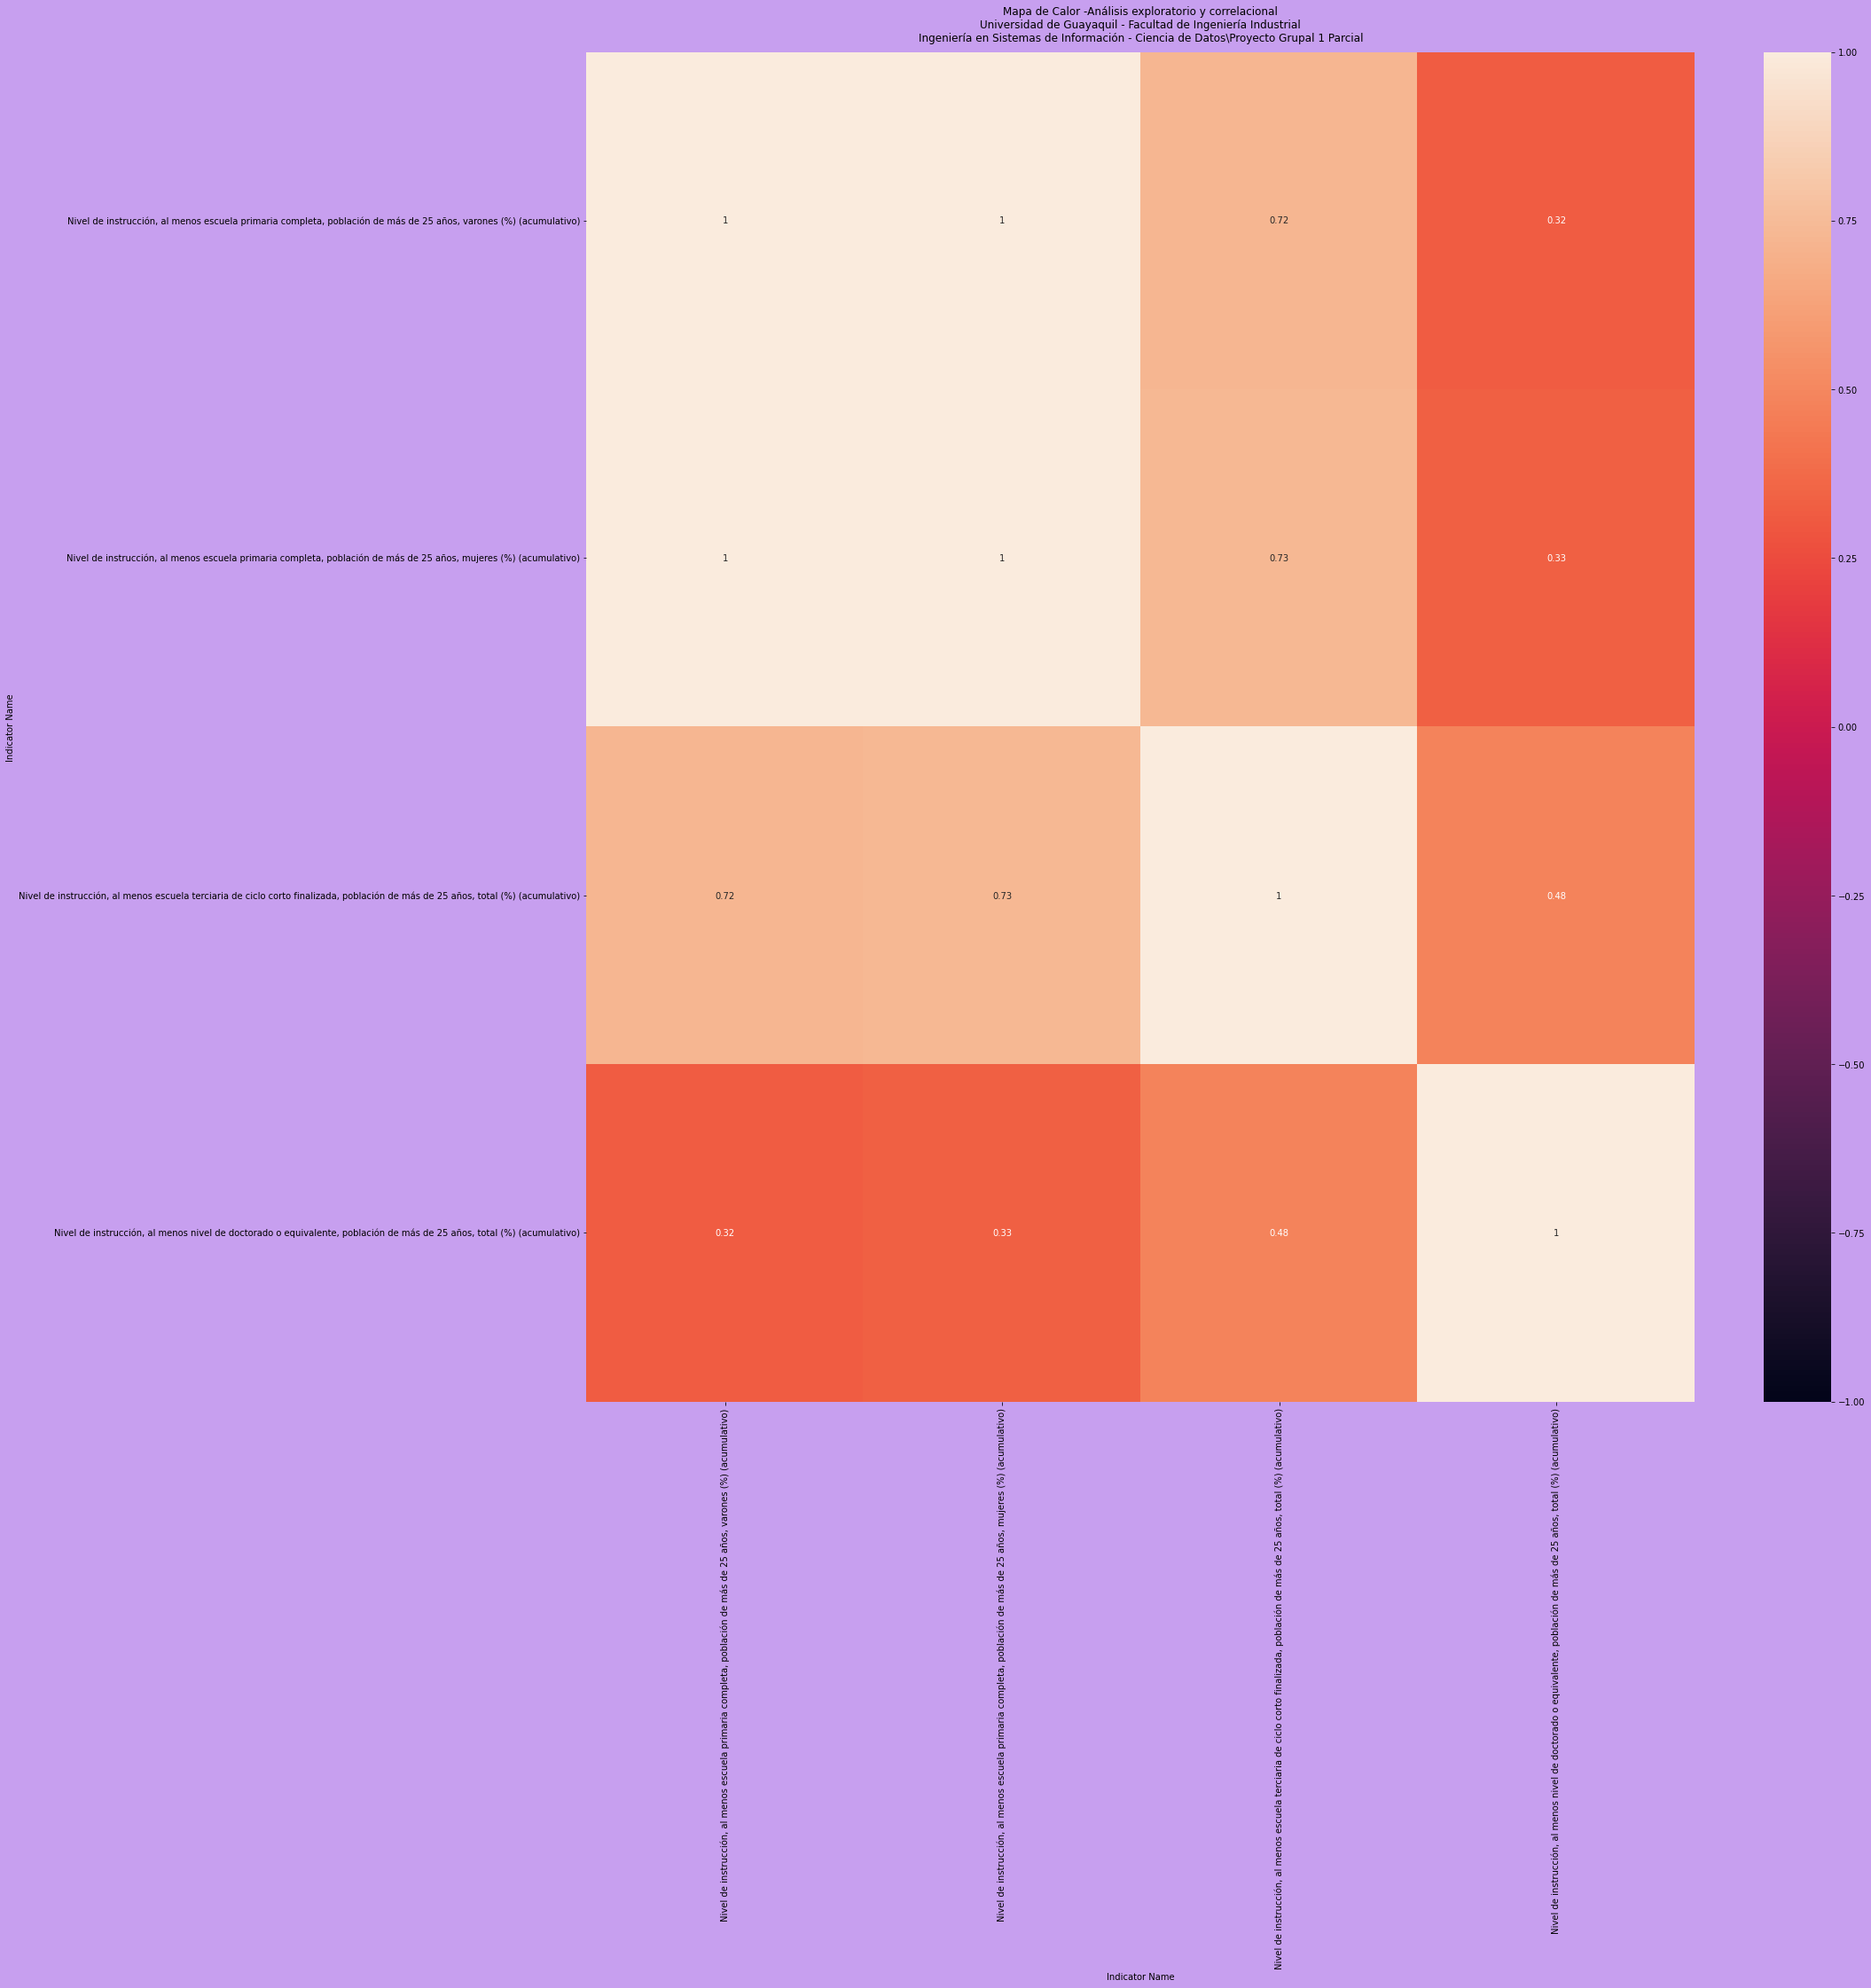

In [ ]:
ana_plot(datorginal1)

**Realizar el Ajuste de Escalas si es necesario.**

In [ ]:
Scaler = StandardScaler()
dataset_Ajustado = Scaler.fit_transform(datorginal1.astype(float))

# **Determinar el K adecuado usando la técnica de análisis del codo o la técnica de la silueta.**

In [ ]:
X = np.array(datorginal1[['Nivel de instrucción, al menos escuela primaria completa, población de más de 25 años, varones (%) (acumulativo)']])
y = np.array(datorginal1['Nivel de instrucción, al menos escuela primaria completa, población de más de 25 años, mujeres (%) (acumulativo)'])

In [ ]:
def Elbow(i, j, k):
  kmeans = [KMeans(n_clusters=i) for i in range(i, j)]
  score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
  plt.plot(range(i, j),score)
  plt.xlabel(k)
  plt.ylabel('Score')
  plt.title('Técnica de análisis del codo')
  plt.grid()
  plt.show()

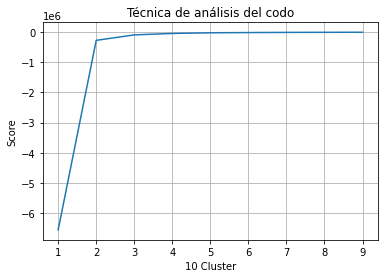

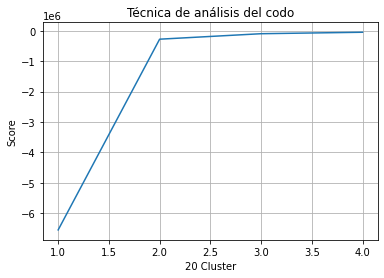

In [ ]:
Elbow(1, 10 , "10 Cluster")
Elbow(1, 5 , "20 Cluster")

# **Crear el modelo K-Means con el K adecuado.**

In [ ]:
#Metodo KMeans cluster
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(datorginal1)
labels = kmeans.labels_

# **Asignar los clusters de K-means al dataset original.**

In [ ]:
datorginal1.columns


Index(['Nivel de instrucción, al menos escuela primaria completa, población de más de 25 años, varones (%) (acumulativo)',
       'Nivel de instrucción, al menos escuela primaria completa, población de más de 25 años, mujeres (%) (acumulativo)',
       'Nivel de instrucción, al menos escuela terciaria de ciclo corto finalizada, población de más de 25 años, total (%) (acumulativo)',
       'Nivel de instrucción, al menos nivel de doctorado o equivalente, población de más de 25 años, total (%) (acumulativo)'],
      dtype='object', name='Indicator Name')

In [ ]:
new_dfa = pd.DataFrame(data = datorginal1, columns = ['Nivel de instrucción, al menos escuela primaria completa, población de más de 25 años, varones (%) (acumulativo)','Nivel de instrucción, al menos escuela primaria completa, población de más de 25 años, mujeres (%) (acumulativo)'])
new_dfa['label_kmeans'] = labels

# **Describir los clusters usando boxplots y scatters con su respectiva interpretación.**

# Scatter

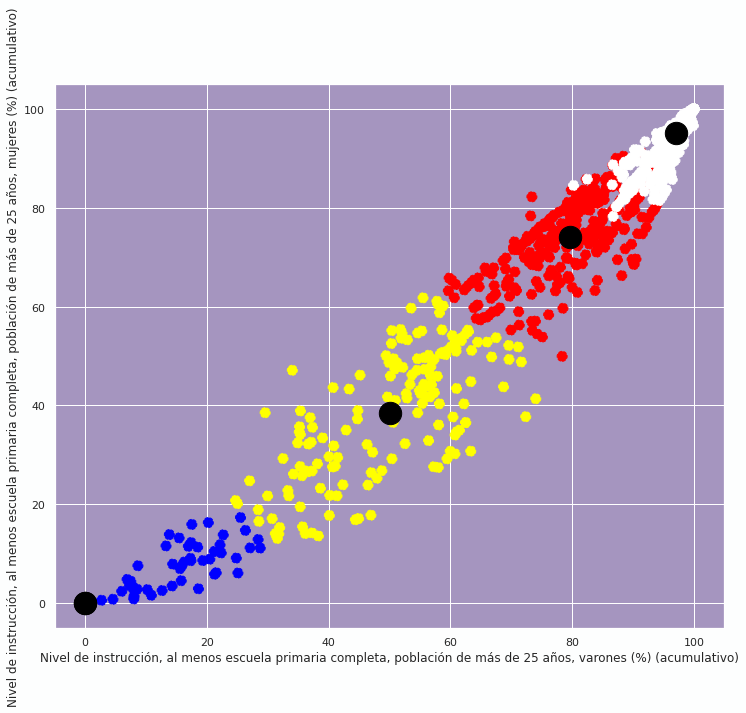

In [ ]:
sns.set(rc={'axes.facecolor':'A595BF','figure.facecolor':'FDFEFE'})
fig, ax = plt.subplots(figsize=(12,10))
plt.scatter(new_dfa["Nivel de instrucción, al menos escuela primaria completa, población de más de 25 años, varones (%) (acumulativo)"][new_dfa["label_kmeans"] == 0], new_dfa["Nivel de instrucción, al menos escuela primaria completa, población de más de 25 años, mujeres (%) (acumulativo)"][new_dfa["label_kmeans"] == 0], 
            color = "blue", s=100, edgecolor='blue',linestyle='--')
plt.scatter(new_dfa["Nivel de instrucción, al menos escuela primaria completa, población de más de 25 años, varones (%) (acumulativo)"][new_dfa["label_kmeans"] == 1], new_dfa["Nivel de instrucción, al menos escuela primaria completa, población de más de 25 años, mujeres (%) (acumulativo)"][new_dfa["label_kmeans"] == 1], 
            color = "red", s=100, edgecolor='red',linestyle='--')
plt.scatter(new_dfa["Nivel de instrucción, al menos escuela primaria completa, población de más de 25 años, varones (%) (acumulativo)"][new_dfa["label_kmeans"] == 2], new_dfa["Nivel de instrucción, al menos escuela primaria completa, población de más de 25 años, mujeres (%) (acumulativo)"][new_dfa["label_kmeans"] == 2], 
            color = "white", s=100, edgecolor='white',linestyle='--')
plt.scatter(new_dfa["Nivel de instrucción, al menos escuela primaria completa, población de más de 25 años, varones (%) (acumulativo)"][new_dfa["label_kmeans"] == 3], new_dfa["Nivel de instrucción, al menos escuela primaria completa, población de más de 25 años, mujeres (%) (acumulativo)"][new_dfa["label_kmeans"] == 3], 
            color = "yellow", s=100, edgecolor='yellow',linestyle='--')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500);
ax.set_xlabel('Nivel de instrucción, al menos escuela primaria completa, población de más de 25 años, varones (%) (acumulativo)')
ax.set_ylabel('Nivel de instrucción, al menos escuela primaria completa, población de más de 25 años, mujeres (%) (acumulativo)')
plt.show()

**Interpretación**

A través del gráfico de Scatter se puede visualizar el porcentaje de de población mayor de 25 años que al menos a terminado la escuela primaria con el fin de determinar, cuál género (masculino y femenimo) es el que más a logrado culminar sus estudios siendo mayores de 25 años según dicha data.

# Boxplot

0.0                                                         AxesSubplot(0.1,0.89465;0.235294x0.0053495)
 Ingreso mediano                                       AxesSubplot(0.382353,0.89465;0.235294x0.0053495)
Afganistán                                             AxesSubplot(0.664706,0.89465;0.235294x0.0053495)
Albania                                                    AxesSubplot(0.1,0.888231;0.235294x0.0053495)
Alemania                                              AxesSubplot(0.382353,0.888231;0.235294x0.0053495)
                                                                            ...                        
previa al dividendo demográfico                       AxesSubplot(0.664706,0.342582;0.235294x0.0053495)
total de la AIF                                            AxesSubplot(0.1,0.336163;0.235294x0.0053495)
África al sur del Sahara                              AxesSubplot(0.382353,0.336163;0.235294x0.0053495)
África al sur del Sahara (BIRF y la AIF)              AxesSubplo

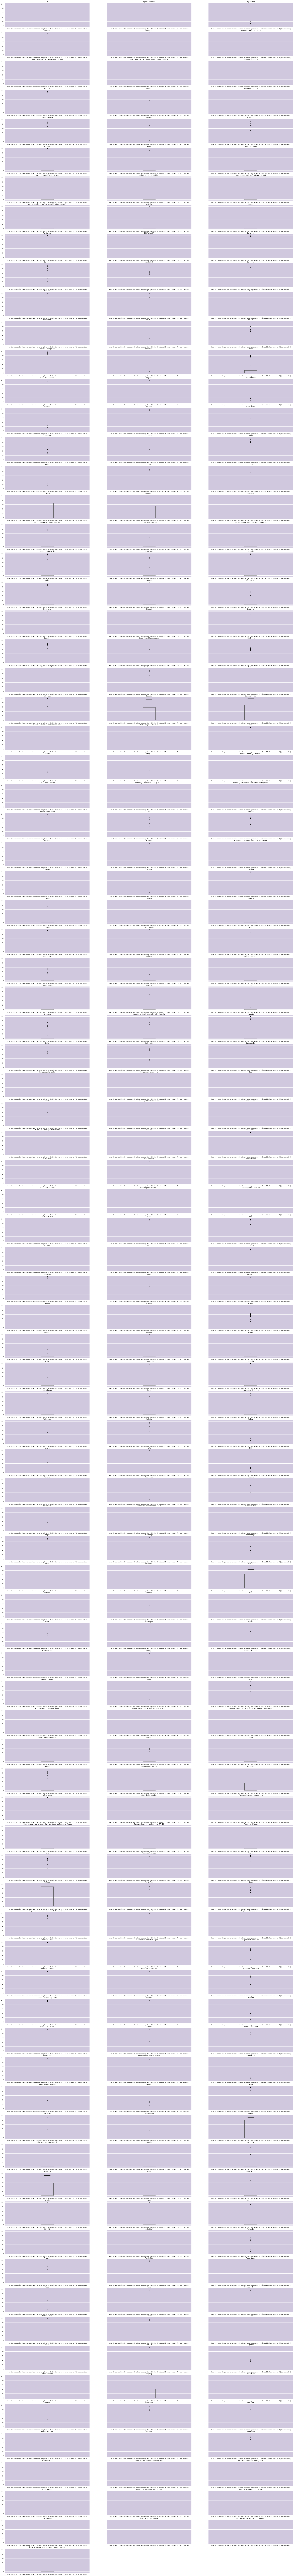

In [ ]:
sns.set(rc={'axes.facecolor':'d0c8de'}) 
dfokf.groupby("Country Name").boxplot(column = 'Nivel de instrucción, al menos escuela primaria completa, población de más de 25 años, varones (%) (acumulativo)',figsize=(40,500),layout=(117,3))

En Albania el nivel de instrucción primaria completa en la población mayor de 25 años es bajo en comparación con otros países. Se mencionan varios países de América Latina y el Caribe, Europa, Asia y África que tienen un mayor porcentaje de población con instrucción primaria completa. También se menciona que algunos de estos países tienen ingresos altos, medios o bajos, y se refiere a los diferentes niveles de desarrollo económico. En general, se puede concluir que hay una variedad de niveles de instrucción primaria completa en diferentes países y que está relacionado con los niveles de desarrollo económico.

0.0                                                         AxesSubplot(0.1,0.89465;0.235294x0.0053495)
 Ingreso mediano                                       AxesSubplot(0.382353,0.89465;0.235294x0.0053495)
Afganistán                                             AxesSubplot(0.664706,0.89465;0.235294x0.0053495)
Albania                                                    AxesSubplot(0.1,0.888231;0.235294x0.0053495)
Alemania                                              AxesSubplot(0.382353,0.888231;0.235294x0.0053495)
                                                                            ...                        
previa al dividendo demográfico                       AxesSubplot(0.664706,0.342582;0.235294x0.0053495)
total de la AIF                                            AxesSubplot(0.1,0.336163;0.235294x0.0053495)
África al sur del Sahara                              AxesSubplot(0.382353,0.336163;0.235294x0.0053495)
África al sur del Sahara (BIRF y la AIF)              AxesSubplo

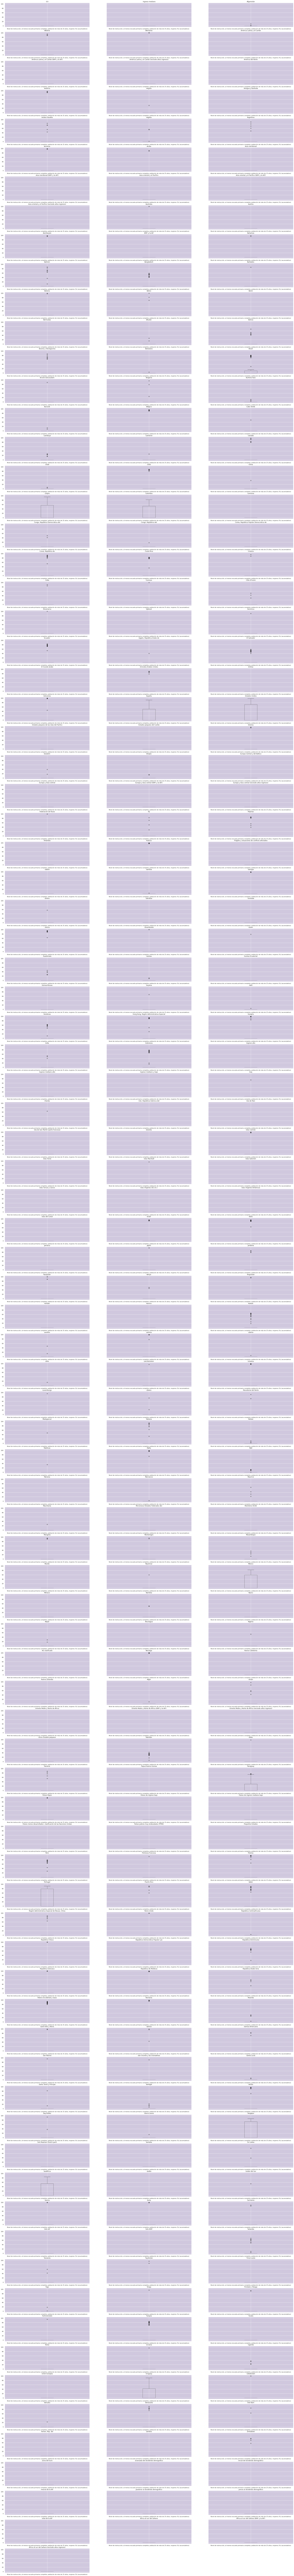

In [ ]:
sns.set(rc={'axes.facecolor':'d0c8de'}) 
dfokf.groupby("Country Name").boxplot(column = 'Nivel de instrucción, al menos escuela primaria completa, población de más de 25 años, mujeres (%) (acumulativo)',figsize=(40,500),layout=(117,3))

Conclusion


El nivel de Instrucción, al menos la primaria completa que se muestran en los diferentes bloxpot 
en cuanto a la población mas de 25 años en Albania es minimo tal cual como lo refleja en los siguientes paises a continuación:
América latina y el Caribe existe un pequeño porcentaje de la escuela primaria completa
Andorra, Asi oriental y el Pacífico (aunque esta excluido de los altos ingresos)
Azerbaiyán, Bosnia y Herzegovina, Eslovenia, Eswatini, 
Federación de Rusia, Gabón, Ghana, Honduras, Irlanda, Islas Feroe,
Islas Turcas y Caicos, Islas del Canal, Jamaica, Kazajstán,
Kiribati, Lesotho, Mauritania, Monaco, Nepal, Nueva Zelandia,
Oriente Medio y Norte de África,
Panamá, Republica Checa, Sudafrica, Unión Europea,
A diferencia de Arabia Saudita,Armenia,Belarus,Guinea,
India, Belice, Bhután, Camerún, Estados del Caribe, Francia,
Malta, Reino Unido, Estonia, Brasil, Dominica, Eritrea, Qatar, 
Republica Centroafricana, Zambia, Sierra Leona, Reino Unido,Asia Meridional, China, Liberia, China 
en estos paises existe mayor presencia de instrucción al menos en escuelas primarias.
En algunos bloxplot refleja algunos paises con ingresos altos, ingreso mediano alto, ingresos bajos, ingresos medianos bajos, inicios de dividendo demográficos,
paises pobres muy endeudados.

In [ ]:
!pip install --upgrade geopandas

In [ ]:
import geopandas

In [ ]:
def datos(name, year):
  return dfokf[[name,'Country Name']][
        (dfokf['Year'] == year)]

In [ ]:
var1 = 'Nivel de instrucción, al menos escuela primaria completa, población de más de 25 años, mujeres (%) (acumulativo)'
var2 = 'Nivel de instrucción, al menos escuela primaria completa, población de más de 25 años, varones (%) (acumulativo)'
column1 = 'Mujeres'
column2 = 'Hombres'
column3 = 'Country Name'

Link de los archivos del mapa: 

In [ ]:
def datosmerge(year):
  countries = geopandas.read_file('/content/drive/MyDrive/Ciencia de Datos/Proyecto/Mapa Mundo/Mundo/Paises_Mundo.shp')
  countries = countries.rename(columns={'PAÍS':'Country Name'})
  countries = pd.merge(countries, datos(var1,year), on=column3)
  countries = pd.merge(countries, datos(var2,year), on=column3)
  countries = countries.rename( columns={var1:column1,var2:column2})
  return countries

In [ ]:
def grafico(title, column, year):
  countries = datosmerge(year)
  fig, ax = plt.subplots(figsize=(15,7))
  ax.set_title(title)
  countries.plot(column=column, legend=True ,cmap='Blues', ax=ax)

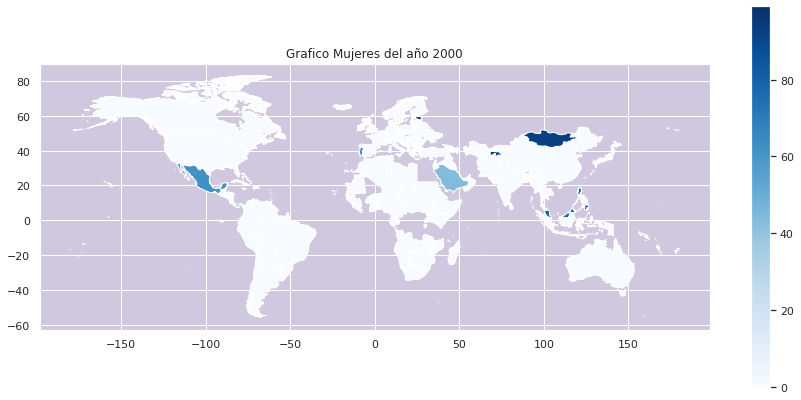

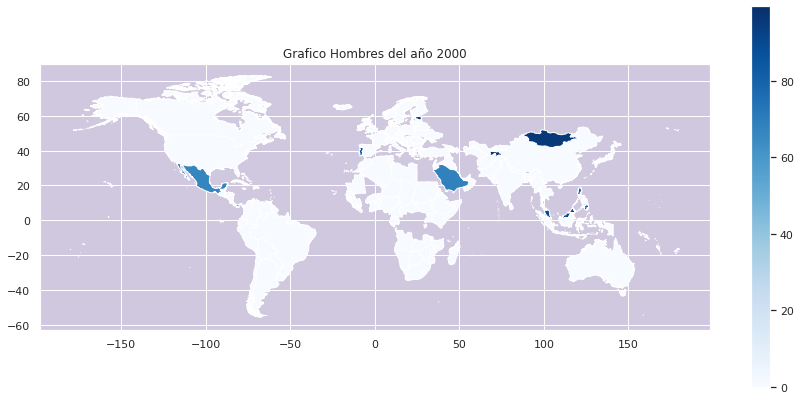

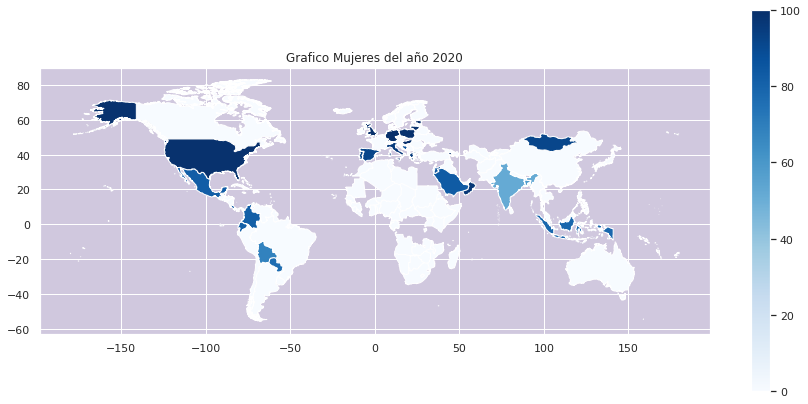

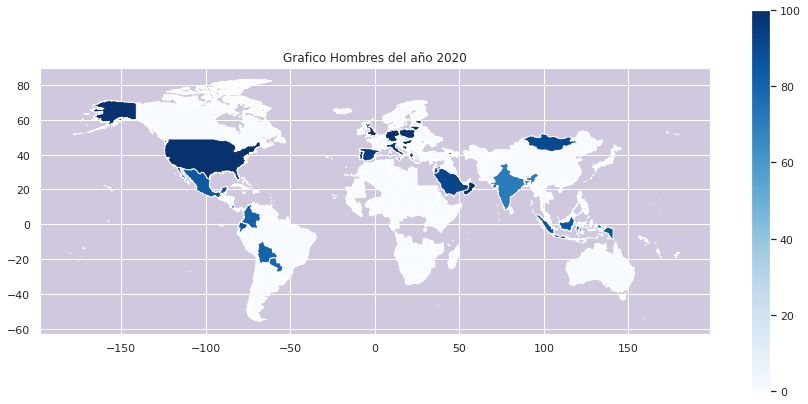

In [ ]:
grafico("Grafico " + str(column1)  + " del año 2000", column1, 2000)
grafico("Grafico " + str(column2)  + " del año 2000", column2, 2000)
grafico("Grafico " + str(column1)  + " del año 2020", column1, 2020)
grafico("Grafico " + str(column2)  + " del año 2020", column2, 2020)

Conclusion

En la grafica de calor del mapa mundo, se puede apreciar el cambio en la variable a lo largo del tiempo especificacmente 20 años. si hay relacion entre la dos varibles directa, por lo que si ha aumentado el Nivel de instrucción, al menos escuela primaria completa, población de más de 25 años, ahora se puede apreciar un sesgo en los datos ya sea por que los datos no existe o en realidad son valores insuales de poco tamaño en algunos paises. la educacion a avanzado en los ultimos años, ya sea para el hombre y la mujer y la brecha de la desigualdad poco a poco va despareciendo en estas variable y en este nivel de instrucción academica. 